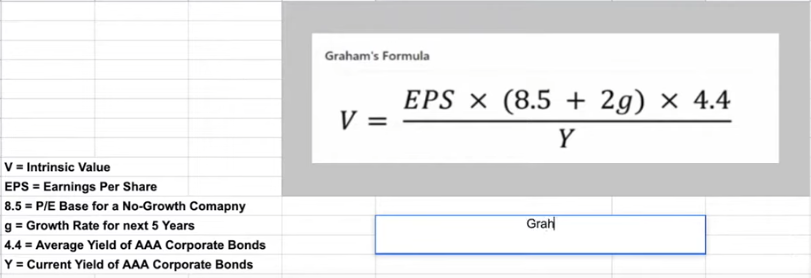

In [1]:
import pandas as pd
import numpy as np
import os
import yfinance as yf

In [2]:
tick = yf.Ticker("AAPL")

In [17]:
tick_info = tick.info

In [13]:
EPS = tick_info["trailingEps"]
EPS

6.1370000000000005

In [20]:
growth_5Y = tick.analysis["Growth"].loc["+5Y"]*100
growth_5Y

9.91

In [15]:
import requests
from bs4 import BeautifulSoup as soup

URL = "https://fred.stlouisfed.org/series/AAA"
page = requests.get(URL)
content = soup(page.content, "html.parser")

bond_rate = float(content.find("span", "series-meta-observation-value").text)
bond_rate

4.13

In [16]:
PE_base = 8.5
avg_bond = 4.4

In [26]:
intrinsic_value = round((EPS * (8.5 + 2*growth_5Y) * 4.4)/ bond_rate, 2)
intrinsic_value

185.16

In [27]:
current_price = tick_info["currentPrice"]
current_price

145.38

In [30]:
margin_of_safety = 0.2

In [31]:
acceptable_price = intrinsic_value * (1 - margin_of_safety)
acceptable_price

148.12800000000001